# 震源物理学演習 レポート第1回
## 1. (1)
演習第1回で，媒質1から2に入射するときの透過係数と反射係数は
\begin{equation}
    \begin{aligned}
        T_{12} &= \frac{2\mu_1\grave{\eta}_1}{\mu_2\grave{\eta}_2 + \mu_1\grave{\eta}_1} \\
        R_{12} &= \frac{\mu_1\grave{\eta}_1-\mu_2\grave{\eta}_2}{\mu_2\grave{\eta}_2+\mu_1\grave{\eta}_1}
    \end{aligned}
\end{equation}
であるが，レポートだと下（媒質2）からの入射を考えているので，$\rho_1=2500\,\text{(kg/m}^3\text{)}, \beta_1=2000\,\text{(m/s)}, \rho_2=2000\,\text{(kg/m}^3\text{)}, \beta_2 = 500\,\text{(m/s)}$として上の式に代入する．

Text(0, 0.5, 'Transmission Coefficient')

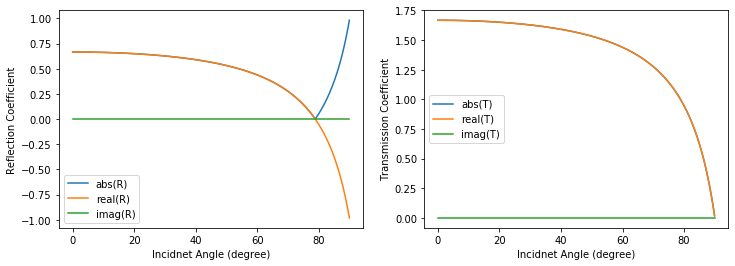

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rho1 = 2500
beta1 = 2000
rho2 = 2000
beta2 = 500

th = np.arange(0, 90, 0.1)*np.pi/180 # 入射角

p = np.sin(th)/beta1 # スローネス

mu1 = rho1*beta1*beta1
mu2 = rho2*beta2*beta2
arg = (1/(beta1*beta1)-p*p).astype(np.complex128)
eta1 = np.sqrt(arg)
arg = (1/(beta2*beta2)-p*p).astype(np.complex128)
eta2 = np.sqrt(arg)

ref = (eta1*mu1-eta2*mu2)/(eta1*mu1+eta2*mu2) # 反射係数
tra = 2*mu1*eta1/(eta1*mu1+eta2*mu2) # 透過係数

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(th*180/np.pi, abs(ref), label='abs(R)')
plt.plot(th*180/np.pi, np.real(ref), label='real(R)')
plt.plot(th*180/np.pi, np.imag(ref), label='imag(R)')
plt.legend(loc='lower left')
plt.xlabel('Incidnet Angle (degree)')
plt.ylabel('Reflection Coefficient')
plt.subplot(1,2,2)
plt.plot(th*180/np.pi, abs(tra), label='abs(T)')
plt.plot(th*180/np.pi, np.real(tra), label='real(T)')
plt.plot(th*180/np.pi, np.imag(tra), label='imag(T)')
plt.legend(loc='best')
plt.xlabel('Incidnet Angle (degree)')
plt.ylabel('Transmission Coefficient')


## 1. (2)
先ほどの反射係数，透過係数の式に$\rho_1=2000\,\text{(kg/m}^3\text{)}, \beta_1=500\,\text{(m/s)}, \rho_2=2500\,\text{(kg/m}^3\text{)}, \beta_2 = 2000\,\text{(m/s)}$を代入する．

Text(0, 0.5, 'Transmission Coefficient')

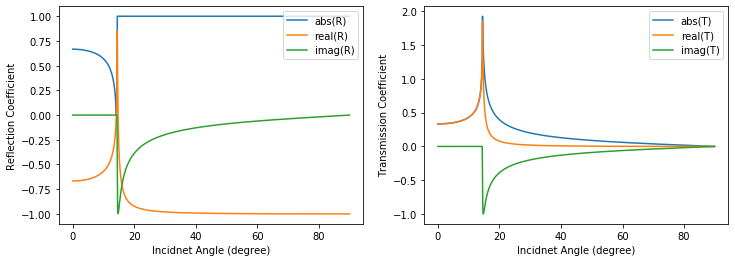

In [2]:
rho1 = 2000
beta1 = 500
rho2 = 2500
beta2 = 2000

th = np.arange(0, 90, 0.1)*np.pi/180 # 入射角

p = np.sin(th)/beta1 # スローネス


mu1 = rho1*beta1*beta1
mu2 = rho2*beta2*beta2
arg = (1/(beta1*beta1)-p*p).astype(np.complex128)
eta1 = np.sqrt(arg)
arg = (1/(beta2*beta2)-p*p).astype(np.complex128)
eta2 = np.sqrt(arg)
ref = (eta1*mu1-eta2*mu2)/(eta1*mu1+eta2*mu2)
tra = 2*mu1*eta1/(eta1*mu1+eta2*mu2)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(th*180/np.pi, abs(ref), label='abs(R)')
plt.plot(th*180/np.pi, np.real(ref), label='real(R)')
plt.plot(th*180/np.pi, np.imag(ref), label='imag(R)')
plt.legend(loc='upper right')
plt.xlabel('Incidnet Angle (degree)')
plt.ylabel('Reflection Coefficient')
plt.subplot(1,2,2)
plt.plot(th*180/np.pi, abs(tra), label='abs(T)')
plt.plot(th*180/np.pi, np.real(tra), label='real(T)')
plt.plot(th*180/np.pi, np.imag(tra), label='imag(T)')
plt.legend(loc='best')
plt.xlabel('Incidnet Angle (degree)')
plt.ylabel('Transmission Coefficient')

入射角が$\theta_c=\sin^{-1}(\beta_1/\beta_2)$を超えると全反射になっている．

In [3]:
thc = np.arcsin(beta1/beta2)
print(thc*180/np.pi)

14.477512185929923


## 2.(1)

$f(t) = e^{-5(t-3)^2}$のフーリエ変換は

\begin{equation}
    \begin{aligned}
        \hat{f}(\omega) &= \int_{-\infty}^\infty e^{-5(t-3)^2}e^{i\omega t}dt \\
        &= \int_{-\infty}^\infty e^{-5\left[t-\left(3+\frac{i\omega}{10}\right)\right]^2 + 5\left(3+\frac{i\omega}{10}\right)^2-45}dt \\
        &= \sqrt{\frac{\pi}{5}}e^{-\frac{\omega^2}{20}}e^{3i\omega}
    \end{aligned}
\end{equation}
となる．ここで，2行目から3行目は，ガウス積分（$\int_{-\infty}^\infty e^{-at^2}dt = \sqrt{\pi/a}$）を使った．

## 2.(2)
まず，我々が使っているフーリ変換の定義を振り返ると
- フーリエ変換

\begin{equation}
    \begin{aligned}
        F(\omega) &= \int_{-\infty}^\infty f(t)e^{i\omega t}dt \\
        &\downarrow \text{離散化}\\
        F(k\Delta\omega) &= \Delta t\sum_{n=0}^{N-1}f(n\Delta t)e^{ik\Delta\omega n\Delta t}
    \end{aligned}
\end{equation}

- 逆フーリエ変換

\begin{equation}
    \begin{aligned}
        f(t) &= \frac{1}{2\pi}\int_{-\infty}^\infty F(\omega)e^{-i\omega t}d\omega \\
        &\downarrow \text{離散化}\\
        f(n\Delta t) &= \frac{\Delta \omega}{2\pi}\sum_{k=0}^{N-1}F(k\Delta \omega)e^{-ik\Delta\omega n\Delta t} \\
        &= \frac{1}{N\Delta t}\sum_{k=0}^{N-1}F(k\Delta \omega)e^{-ik\Delta\omega n\Delta t}
    \end{aligned}
\end{equation}

一方で，python（scipy）におけるフーリエ変換の定義は
- fft.fft: 
\begin{equation}
    F'(k\Delta \omega) = \sum_{n=0}^{N-1}f'(n\Delta t)e^{-ik\Delta \omega n\Delta t}
\end{equation}
- fft.ifft:
\begin{equation}
    f'(n\Delta t) = \frac{1}{N}\sum_{k=0}^{N-1}F'(k\Delta \omega)e^{ik\Delta\omega n\Delta t}
\end{equation}

である．



つまり、PythonのFFTと我々の定義を一致させるなら、フーリ変換と逆変換を以下のように行えばいいことになる．つまり，フーリエ変換には逆変換の関数を使い，逆変換には順変換の関数を使う．

\begin{equation}
    \begin{split}
        F(k\Delta\omega) &= N\Delta t * \text{fft.ifft}(f) \\
        &= \text{fft.ifft}(f) / \Delta f\\
        f(n\Delta t) &= \text{fft.fft}(F) / N\Delta t \\
        &= \text{fft.fft}(F) * \Delta f
    \end{split}
\end{equation}

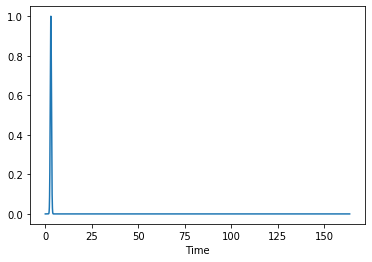

In [4]:
N = 8192 # データ数
dt = 0.02 # 時間間隔
df = 1.0/(N*dt) # 周波数刻み
t = np.arange(0, N*dt, dt) # 時間軸

ft = np.exp(-5*(t-3)**2)
plt.plot(t, ft); plt.xlabel("Time");

### 手計算のプロット

Text(0.5, 0, 'Ang. Freq.')

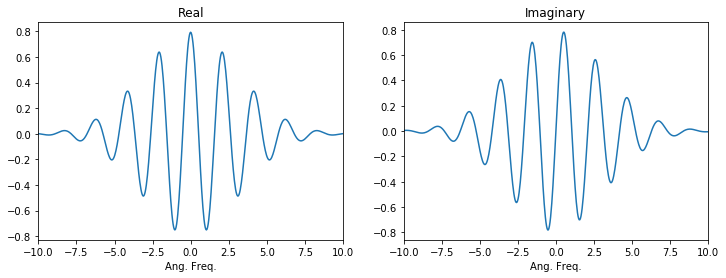

In [5]:
from scipy import fft # scipyのfftを使う．少し前まではfftpackだった．

w = fft.fftshift(fft.fftfreq(N, dt))*2*np.pi # 角周波数

Fw_th = np.sqrt(np.pi/5)*np.exp(-w*w/20)*np.exp(3*1j*w) # 手計算によるフーリエ変換

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(w, np.real(Fw_th)); plt.xlim([-10, 10]); plt.title("Real"); plt.xlabel("Ang. Freq.")
plt.subplot(1,2,2); plt.plot(w, np.imag(Fw_th)); plt.xlim([-10, 10]); plt.title("Imaginary"); plt.xlabel("Ang. Freq.")

### FFTのプロット

Text(0.5, 0, 'Ang. Freq.')

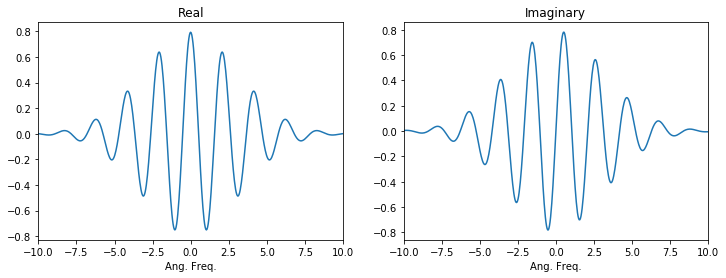

In [6]:
Fw_cal = fft.ifft(ft)/df # FFT

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(w, np.real(fft.fftshift(Fw_cal))); plt.xlim([-10, 10]); plt.title("Real"); plt.xlabel("Ang. Freq.")
plt.subplot(1,2,2); plt.plot(w, np.imag(fft.fftshift(Fw_cal))); plt.xlim([-10, 10]); plt.title("Imaginary"); plt.xlabel("Ang. Freq.")

解析に求めたフーリエ変換と振幅，そして位相も一致している様子がわかる．

### FFTしたものを逆フーリエ変換（iFFT）してみる．

Text(0.5, 0, 'Time')

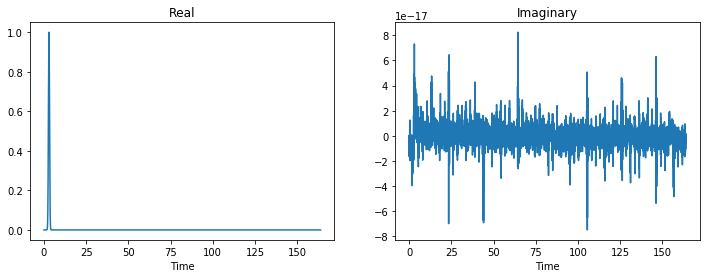

In [7]:
ft_cal = fft.fft(Fw_cal)*df # iFFT

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(t, np.real(ft_cal)); plt.title("Real"); plt.xlabel("Time")
plt.subplot(1,2,2); plt.plot(t, np.imag(ft_cal)); plt.title("Imaginary"); plt.xlabel("Time")

当たり前ではあるが，元のガウス関数に戻っていることが確認できる．

## 2.(3)
フーリエ変換（級数）は，任意の関数が三角関数の重ね合わせによって表現できるというものである．逆フーリエ変換の式をみると
\begin{equation}
    \begin{aligned}
        f(t) &= \frac{1}{2\pi}\int_{-\infty}^\infty \hat{f}(\omega)e^{-i\omega t}d\omega \\
        f(t)e^{i\omega px} &= \frac{1}{2\pi}\int_{-\infty}^\infty \hat{f}(\omega)e^{-i\omega (t-px)}d\omega
    \end{aligned}
\end{equation}
と書き換えることができる．
つまり，$f(t)$は，平面波の重ね合わせによって表現でき，各周波数に対する平面波の振幅が$\hat{f}(\omega)$と考えることができる．我々はそもそも平面波の解の形を仮定して問題を解いてきた．これは，周波数領域である周波数に対する解を求めていたことに相当する．

したがって，演習第2回で求めた
\begin{equation}
    u_{y1}(z,\omega) = \frac{2\eta_2\mu_2\cos(\omega\eta_1z)}{\eta_2\mu_2\cos(\omega\eta_1H)-i\eta_1\mu_1\sin(\omega\eta_1H)}\hat{f}(\omega){\color{red}e^{\color{red}{-i\omega(t-px)}}}
\end{equation}
の指数関数以外の部分が周波数領域における変位に対応する．


Text(0.5, 1.0, 'Displacement in Freq. Domain')

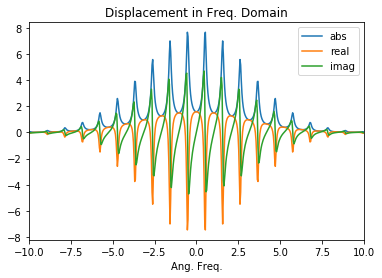

In [8]:
rho1 = 2000
rho2 = 2500
beta1 = 500
beta2 = 2000
H = 1500
z = 0


mu1 = rho1*beta1*beta1
mu2 = rho2*beta2*beta2
eta1 = 1/beta1
eta2 = 1/beta2

wshift = fft.fftshift(w)

num = 2*mu2*eta2*np.cos(wshift*eta1*z)
den = eta2*mu2*np.cos(wshift*eta1*H)-1j*eta1*mu1*np.sin(wshift*eta1*H)
uw = num*Fw_cal/den

plt.plot(w, abs(fft.fftshift(uw)), label='abs')
plt.plot(w, np.real(fft.fftshift(uw)), label='real')
plt.plot(w, np.imag(fft.fftshift(uw)), label='imag')
plt.xlim(-10,10)
plt.legend()
plt.xlabel('Ang. Freq.')
plt.title('Displacement in Freq. Domain')

         

## 2. (4), (5)
逆フーリエ変換によって各深さにおける変位を求める．

Text(-20, 30, 'z=H')

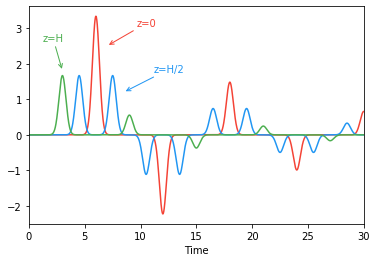

In [9]:
ax = plt.figure().add_subplot(111)

# z = 0
z = 0
num = 2*mu2*eta2*np.cos(wshift*eta1*z)
Uw = num*Fw_cal/den
ut = fft.fft(Uw)*df
plt.plot(t, np.real(ut), color="#f44336"); plt.xlim([0, 30]); plt.xlabel("Time")
ax.annotate('z=0', xy=(7,2.5), xycoords='data', color="#f44336",
            xytext=(30,20), textcoords='offset points', 
            arrowprops=dict(color="#f44336", arrowstyle="->"))

# z = H/2
z = H/2
num = 2*mu2*eta2*np.cos(wshift*eta1*z)
Uw = num*Fw_cal/den
ut = fft.fft(Uw)*df
plt.plot(t, np.real(ut), color="#2196F3")
ax.annotate('z=H/2', xy=(8.5,1.2), xycoords='data', color="#2196F3",
            xytext=(30,20), textcoords='offset points', 
            arrowprops=dict(color="#2196F3", arrowstyle="->"))

# z = H
z = H
num = 2*mu2*eta2*np.cos(wshift*eta1*z)
Uw = num*Fw_cal/den
ut = fft.fft(Uw)*df
plt.plot(t, np.real(ut), color="#4CAF50")
ax.annotate('z=H', xy=(3,1.8), xycoords='data', color="#4CAF50",
            xytext=(-20,30), textcoords='offset points', 
            arrowprops=dict(color="#4CAF50", arrowstyle="->"))

下から入ってきた波が$z=H$で1.7倍に増幅されている．それがそのまま$z=H/2$を通過し，$z=0$で2倍に増幅されている．

$z=0$で反射された波が$z=H/2$を通過し，$z=H$で位相が反転し，0.67倍されたものが上に反射する．これの繰り返しの様子が計算できている．

<img src="schematic_wave.png" width="300px">

In [10]:
R12=(rho1*beta1-rho2*beta2)/(rho1*beta1+rho2*beta2)
print("R12 =", R12)
T12=2*rho1*beta1/(rho1*beta1+rho2*beta2)
print("T12 =", T12)
R21=(rho2*beta2-rho1*beta1)/(rho2*beta2+rho1*beta1)
print("R21 =", R21)
T21=2*rho2*beta2/(rho2*beta2+rho1*beta1)
print("T21 =", T21)

R12 = -0.6666666666666666
T12 = 0.3333333333333333
R21 = 0.6666666666666666
T21 = 1.6666666666666667


## 3.

Text(-30, -20, '3')

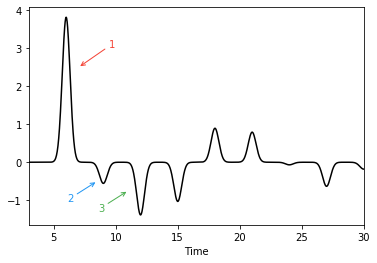

In [11]:
rho1 = 2000
rho2 = 2250
rho3 = 2500
beta1 = 500
beta2 = 1000
beta3 = 2000
mu1 = rho1*beta1*beta1
mu2 = rho2*beta2*beta2
mu3 = rho3*beta3*beta3
z2 = 1500
z3 = 3000
z1 = 0

wshift[0] = 0.000001 # 計算の安定性のため

eta1 = 1 / beta1
eta2 = 1 / beta2
eta3 = 1 / beta3

ax = plt.figure().add_subplot(111)

# propagator matrix
p21a = np.cos(wshift*eta1*(z2-z1))
p21b = -np.sin(wshift*eta1*(z2-z1))/(wshift*eta1*mu1)
p21c = wshift*eta1*mu1*np.sin(wshift*eta1*(z2-z1))
p21d = np.cos(wshift*eta1*(z2-z1))


p32a = np.cos(wshift*eta2*(z3-z2))
p32b = -np.sin(wshift*eta2*(z3-z2))/(wshift*eta2*mu2)
p32c = wshift*eta2*mu2*np.sin(wshift*eta2*(z3-z2))
p32d = np.cos(wshift*eta2*(z3-z2))

pa = p21a*p32a + p21b*p32c
pb = p21a*p32b + p21b*p32d
pc = p21c*p32a + p21d*p32c
pd = p21c*p32b + p21d*p32d



A2d = -(pc-wshift*eta3*mu3*pd*1j)*np.exp(-2*wshift*eta3*z3*1j)*Fw_cal/(pc+wshift*eta3*mu3*pd*1j)
uy0 = (pa+wshift*eta3*mu3*pb*1j)*np.exp(wshift*eta3*z3*1j)*A2d + (pa-wshift*eta3*mu3*pb*1j)*np.exp(-wshift*eta3*z3*1j)*Fw_cal
ut = fft.fft(uy0)*df

# z = 0
plt.plot(t, np.real(ut), color="black"); plt.xlim([3, 30]); plt.xlabel("Time")
ax.annotate('1', xy=(7,2.5), xycoords='data', color="#f44336",
            xytext=(30,20), textcoords='offset points', 
            arrowprops=dict(color="#f44336", arrowstyle="->"))
ax.annotate('2', xy=(8.5,-0.5), xycoords='data', color="#2196F3",
            xytext=(-30,-20), textcoords='offset points', 
            arrowprops=dict(color="#2196F3", arrowstyle="->"))
ax.annotate('3', xy=(11,-0.75), xycoords='data', color="#4CAF50",
            xytext=(-30,-20), textcoords='offset points', 
            arrowprops=dict(color="#4CAF50", arrowstyle="->"))



<img src="3layers.png" width="500px">

\begin{equation}
    \begin{split}
        R_{i\rightarrow j} &= \frac{\rho1\beta1-\rho2\beta2}{\rho1\beta1+\rho2\beta2}\\
        T_{i\rightarrow j} &= \frac{2\rho1\beta1}{\rho1\beta1+\rho2\beta2}
    \end{split}
\end{equation}

In [12]:
R12=(rho1*beta1-rho2*beta2)/(rho1*beta1+rho2*beta2)
print("R12 =", R12)
T12=2*rho1*beta1/(rho1*beta1+rho2*beta2)
print("T12 =", T12)
R21=(rho2*beta2-rho1*beta1)/(rho2*beta2+rho1*beta1)
print("R21 =", R21)
T21=2*rho2*beta2/(rho2*beta2+rho1*beta1)
print("T21 =", T21)
R23=(rho2*beta2-rho3*beta3)/(rho2*beta2+rho3*beta3)
print("R23 =", R23)
T32=2*rho3*beta3/(rho3*beta3+rho2*beta2)
print("T32 =", T32)
amp1 = T32*T21*2
print("amp1 =", amp1)
amp2 = T32*R21*R23*T21*2
print("amp2 =", amp2)
amp3 = T32*T21*R12*2
print("amp3 =", amp3)

R12 = -0.38461538461538464
T12 = 0.6153846153846154
R21 = 0.38461538461538464
T21 = 1.3846153846153846
R23 = -0.3793103448275862
T32 = 1.3793103448275863
amp1 = 3.8196286472148544
amp2 = -0.5572402535724589
amp3 = -1.4690879412364826
